Loss for task 1: 0.6476410583004031
Loss for task 2: 0.5405189143576757
Loss for task 3: 0.5278614410160959
Loss for task 4: 0.5247962985407125
Loss for task 5: 0.5531296730375497
Loss for task 6: 0.5707336715702056
Loss for task 7: 0.647550275439919
Loss for task 8: 0.5309464491998982
Loss for task 9: 0.7328953526474252
Loss for task 10: 0.5661336385491542
Loss for task 11: 0.5874002697147992


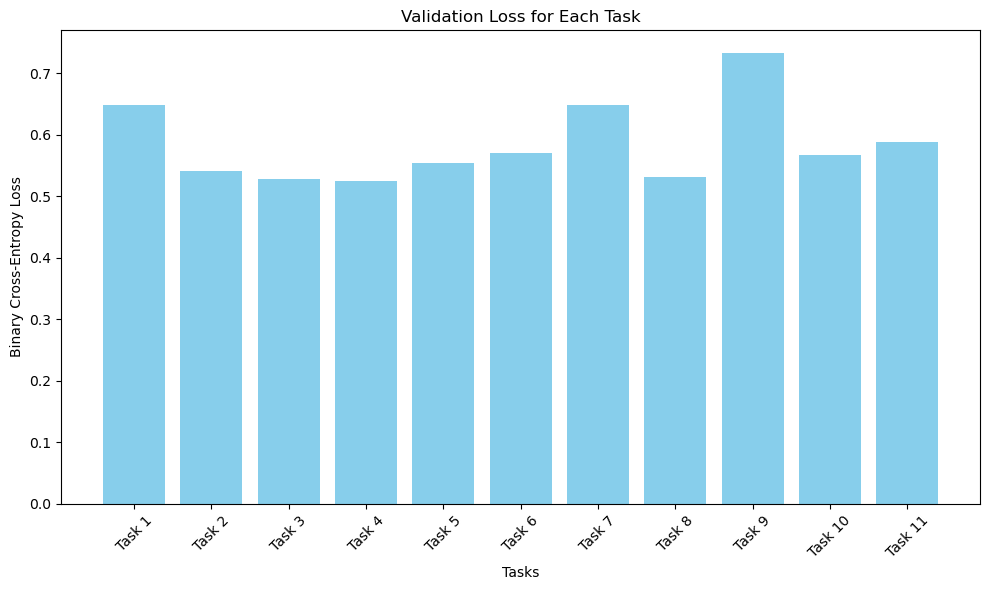

In [13]:
# Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

X_train = np.load('X_train_filled.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test_filled.npy')

# Split the training data into training and validation sets
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = []
val_losses = []

for i in range(y_train.shape[1]):
    # Train model
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_part, y_train_part[:, i])
    models.append(model)
    y_pred = model.predict_proba(X_val)[:, 1]
    loss = log_loss(y_val[:, i], y_pred)
    val_losses.append(loss)
    print(f"Loss for task {i+1}: {loss}")

y_test_pred = models[0].predict_proba(X_test)[:, 1]

tasks = [f'Task {i+1}' for i in range(len(val_losses))]

plt.figure(figsize=(10, 6))
plt.bar(tasks, val_losses, color='skyblue')
plt.xlabel('Tasks')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Validation Loss for Each Task')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



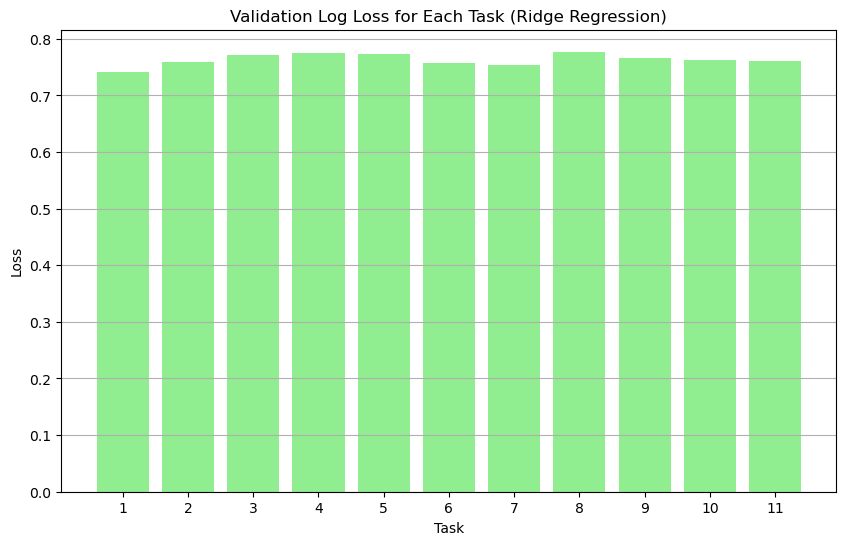

[0.7421729572631868,
 0.7593773160134867,
 0.7705310954150418,
 0.7753693734946553,
 0.7730576755581566,
 0.7566279646117224,
 0.7537523802932204,
 0.7771623353466104,
 0.7659630763177852,
 0.761919070503854,
 0.7611068856697244]

In [16]:
# Ridge
from sklearn.linear_model import Ridge

ridge_models = []
ridge_val_losses = []

for i in range(y_train.shape[1]):
    ridge_model = Ridge(alpha=1.0, random_state=42)
    ridge_model.fit(X_train_part, y_train_part[:, i])
    Y_pred_ridge = ridge_model.predict(X_val)
    Y_pred_ridge_transformed = 1 / (1 + np.exp(-Y_pred_ridge))
    loss_ridge = log_loss(y_val[:, i], Y_pred_ridge_transformed)
    ridge_models.append(ridge_model)
    ridge_val_losses.append(loss_ridge)

# Plot the validation losses for each target using Ridge Regression
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), ridge_val_losses, color='lightgreen')
plt.title('Validation Log Loss for Each Task (Ridge Regression)')
plt.xlabel('Task')
plt.ylabel('Loss')
plt.xticks(range(1, 12))
plt.grid(axis='y')
plt.show()
